In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

In [5]:
x = np.linspace(-6, 6, 100)
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)

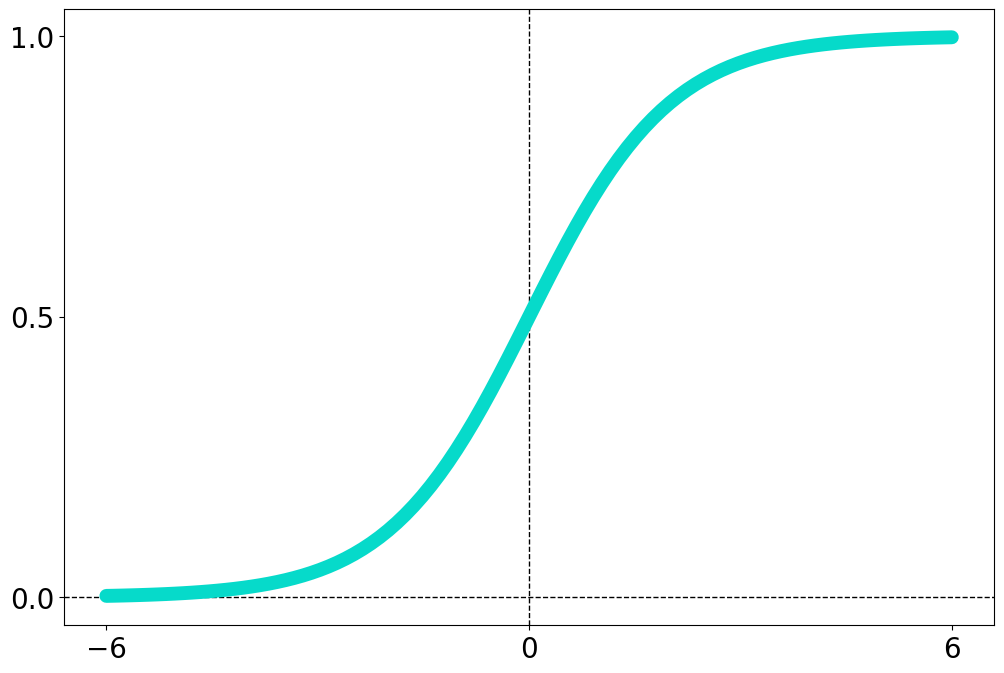

In [6]:
x = np.linspace(-6, 6, 100)
y_sigmoid = sigmoid(x)

# plot sigmoid
fig = plt.figure(figsize=(12, 8)) 
plt.axhline(0, color='black', linewidth=1, linestyle='--')  # Draw x-axis
plt.axvline(0, color='black', linewidth=1, linestyle='--')  # Draw y-axis
plt.xticks([-6, 0, 6], fontsize=20)  # Add x-axis values
plt.yticks([0, 0.5, 1], fontsize=20)  # Add y-axis values
plt.plot(x, y_sigmoid, label='Sigmoid', color='#06DACA', linewidth=10, solid_capstyle='round')

In [7]:
fig.savefig('sigmoid.png', dpi=100, bbox_inches='tight', pad_inches=0.0, transparent=True)

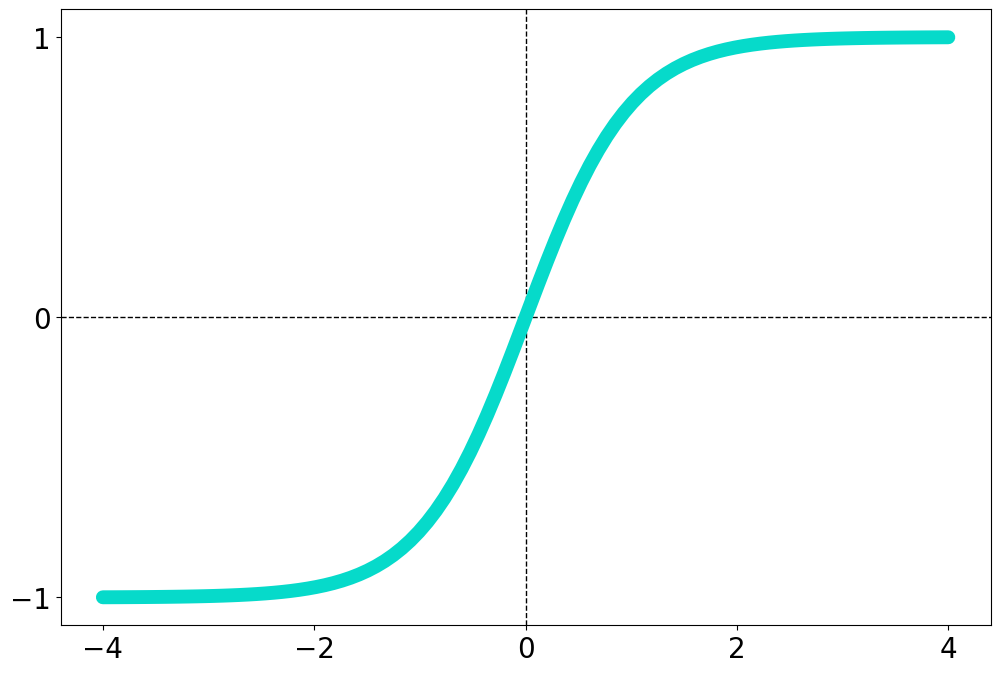

In [8]:
x = np.linspace(-4, 4, 100)
y_tanh = tanh(x)

# plot sigmoid
fig = plt.figure(figsize=(12, 8)) 
plt.axhline(0, color='black', linewidth=1, linestyle='--')  # Draw x-axis
plt.axvline(0, color='black', linewidth=1, linestyle='--')  # Draw y-axis
plt.xticks([-4, -2, 0, 2, 4], fontsize=20)  # Add x-axis values
plt.yticks([-1, 0, 1], fontsize=20)  # Add y-axis values
plt.plot(x, y_tanh, label='tanh', color='#06DACA', linewidth=10, solid_capstyle='round')

In [9]:
fig.savefig('tanh.png', dpi=100, bbox_inches='tight', pad_inches=0.0, transparent=True)

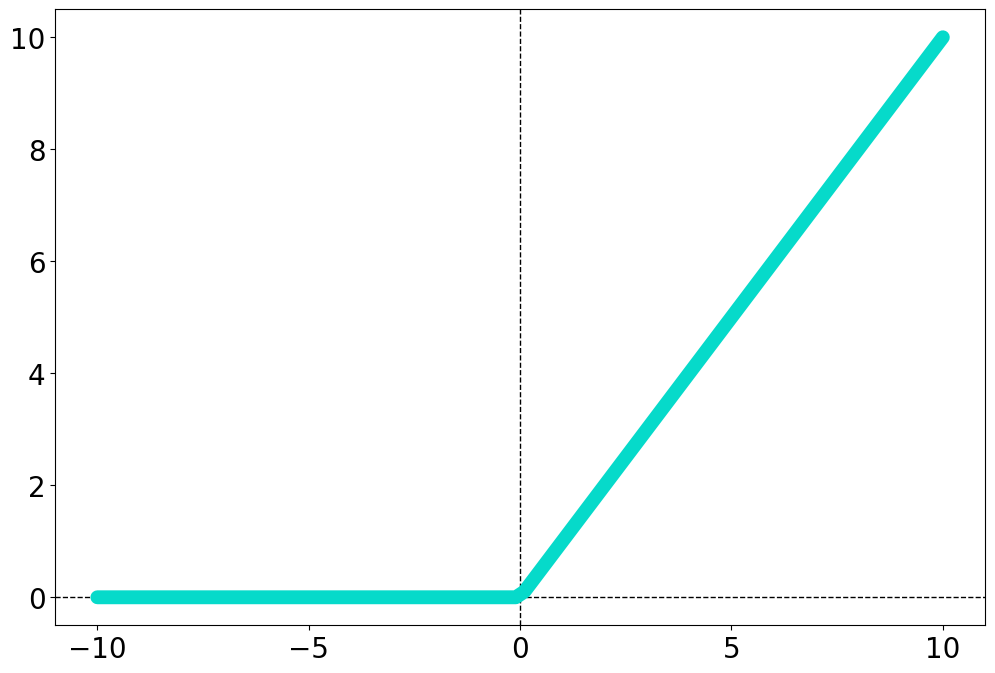

In [10]:
x = np.linspace(-10, 10, 100)
y_relu = relu(x)

# plot sigmoid
fig = plt.figure(figsize=(12, 8)) 
plt.axhline(0, color='black', linewidth=1, linestyle='--')  # Draw x-axis
plt.axvline(0, color='black', linewidth=1, linestyle='--')  # Draw y-axis
plt.xticks([-10, -5, 0, 5, 10], fontsize=20)  # Add x-axis values
plt.yticks(fontsize=20)  # Add y-axis values
plt.plot(x, y_relu, label='ReLU', color='#06DACA', linewidth=10, solid_capstyle='round')
fig.savefig('relu.png', dpi=100, bbox_inches='tight', pad_inches=0.0, transparent=True)

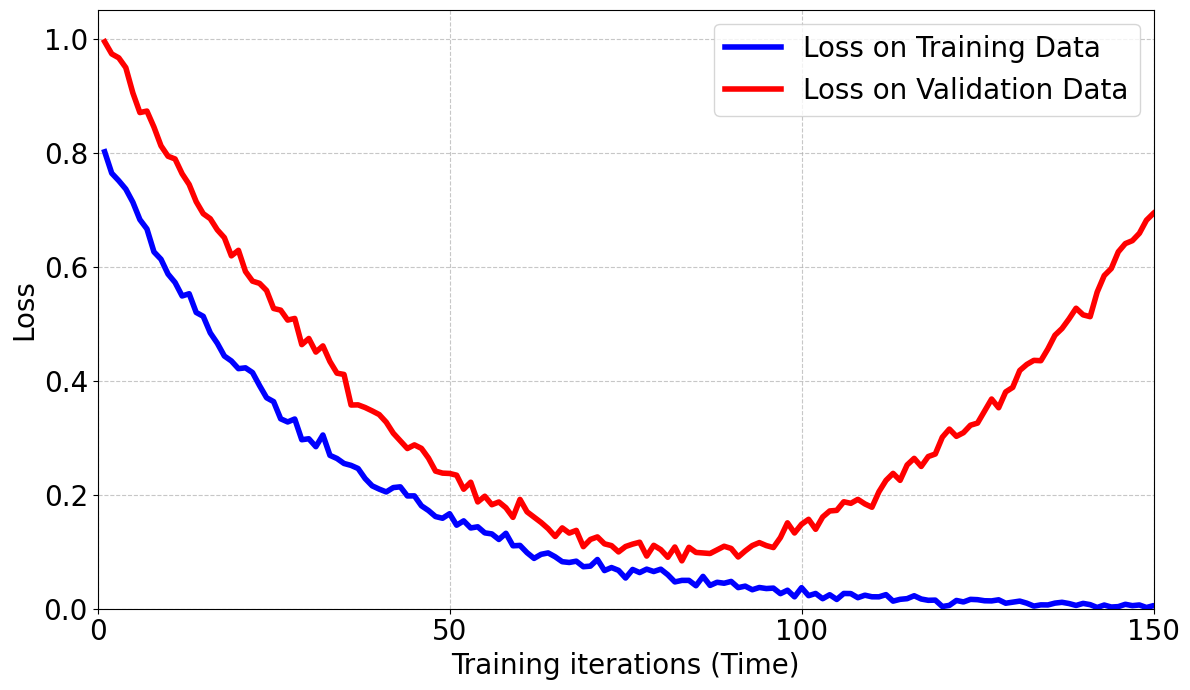

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of training iterations
iterations = np.arange(1, 201)

# Define the raw loss values (initial shapes)
raw_training_loss = 10 * np.exp(-iterations / 30)
raw_validation_loss = 12 * np.exp(-iterations / 40) + 0.01 * (iterations - 80)**2
raw_validation_loss[raw_validation_loss < 0] = 0  # Ensure non-negative

# Normalize the loss values to the range [0, 1]
def normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

normalized_training_loss_base = normalize(raw_training_loss)
normalized_validation_loss_base = normalize(raw_validation_loss)

# Adjust the starting points
training_start = 0.8
validation_start = 0.9

training_loss = normalized_training_loss_base * (training_start / normalized_training_loss_base[0])
validation_loss = normalized_validation_loss_base * (validation_start / normalized_validation_loss_base[0])

# Ensure the values stay within [0, 1] (though with these starting points and decay, it should)
training_loss = np.clip(training_loss, 0, 1)
validation_loss = np.clip(validation_loss, 0, 1) +0.1

t_noise = np.random.normal(0, 0.01, size=iterations.shape)
# Smooth t_noise such that values are near 0 beyond index 100
smoothing_factor = np.linspace(1, 0, len(t_noise))
t_noise *= smoothing_factor
training_loss += t_noise
v_noise = np.random.normal(0, 0.01, size=iterations.shape)
validation_loss += v_noise
# Ensure the values stay within [0, 1]
training_loss = np.clip(training_loss, 0, 1)
validation_loss = np.clip(validation_loss, 0, 1)

# Create the plot
plt.figure(figsize=(12, 7))
plt.plot(iterations, training_loss, label='Loss on Training Data', color='blue', linewidth=4)
plt.plot(iterations, validation_loss, label='Loss on Validation Data', color='red', linewidth=4)

# Add labels and title
plt.xlabel('Training iterations (Time)', fontsize=20)
plt.ylabel('Loss', fontsize=20)

# Add a legend
plt.legend(fontsize=20, loc='upper right')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 150)
plt.ylim(0, 1.05)
plt.xticks([0, 50, 100, 150], fontsize=20)
plt.yticks(fontsize=20)

# Show the plot
plt.tight_layout()
plt.savefig('loss_plot.png', dpi=100, bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()